In [10]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [11]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

# Nway run in photometric prior mode (autocalibration)

In [12]:
magnitude_columns = [
                    ('nnmag_grz', 'auto'),
                    ('nnmag_grzw1', 'auto'),
                    ('nnmag_grzw1w2', 'auto'),
                    ]

ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1,'mag_include_radius': 3.0,
'store_mag_hists': True,}

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.766567,1.969860e-12,NaN
2,2,b'SRGe J110537.6+585120',166.406669,58.855424,0.742422,1.505411e-12,NaN
3,3,b'SRGe J102349.9+563347',155.958041,56.563186,0.724683,1.001123e-12,NaN
4,4,b'SRGe J105057.2+593215',162.738144,59.537414,0.729755,9.137326e-13,NaN
...,...,...,...,...,...,...,...
9210,9210,b'SRGe J102315.1+561957',155.813071,56.332561,4.389278,1.637604e-15,NaN
9211,9211,b'SRGe J102332.5+562524',155.885436,56.423270,3.578448,1.608667e-15,NaN
9212,9212,b'SRGe J102235.0+561919',155.645874,56.321872,3.361668,1.595806e-15,NaN
9213,9213,b'SRGe J102223.5+562357',155.597875,56.399058,3.662990,1.532857e-15,NaN


In [13]:
ero_ctps_pandas

,ID,desi_id_true_ctp
368,b'SRGe J103105.9+573747',b'9011_610714_1440'
257,b'SRGe J103118.8+574434',b'9011_610714_1908'
48,b'SRGe J103123.8+574309',b'9011_610714_2092'
284,b'SRGe J103130.8+573932',b'9011_610714_2412'
173,b'SRGe J103137.0+573159',b'9011_609939_1093'
...,...,...
129,b'SRGe J110633.0+590313',b'9011_614527_1198'
193,b'SRGe J110645.0+590331',b'9011_614527_1596'
169,b'SRGe J110648.4+585514',b'9011_614527_1704'
73,b'SRGe J110721.2+585635',b'9011_614527_2647'


    adding angular separation columns
matching: 145069 matches after filtering by search radius
Primary catalogue "EROSITA" (9215), density gives 2.10e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9215/9215 [00:02<00:00, 3443.03it/s]
Incorporating bias "DESI:nnmag_grz" ...
magnitude histogram of column "DESI_nnmag_grz": 341 secure matches, 5661 insecure matches and 564355 secure non-matches of 2418574 total entries (564696 valid)
magnitude histogram stored to "DESI_nnmag_grz_fit.txt".


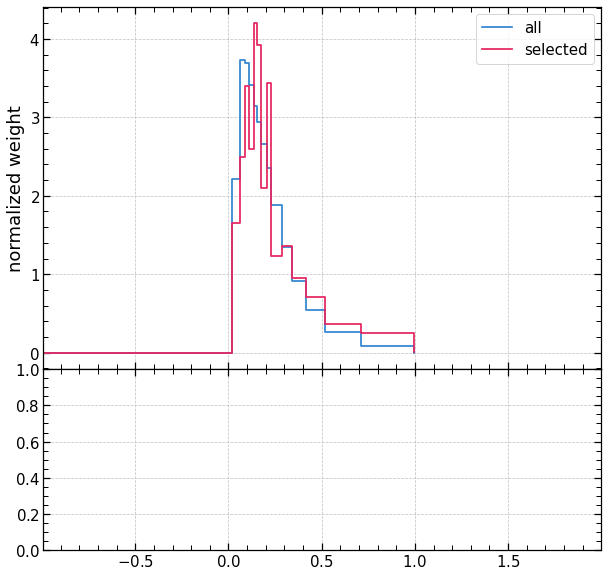

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:nnmag_grzw1" ...
magnitude histogram of column "DESI_nnmag_grzw1": 302 secure matches, 5661 insecure matches and 463991 secure non-matches of 2418574 total entries (464293 valid)
magnitude histogram stored to "DESI_nnmag_grzw1_fit.txt".


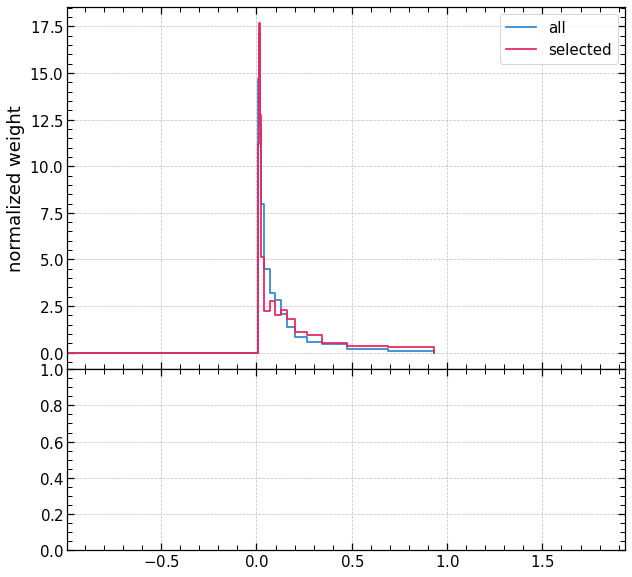

Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogram of column "DESI_nnmag_grzw1w2": 4285 secure matches, 5661 insecure matches and 719240 secure non-matches of 2418574 total entries (723525 valid)
magnitude histogram stored to "DESI_nnmag_grzw1w2_fit.txt".


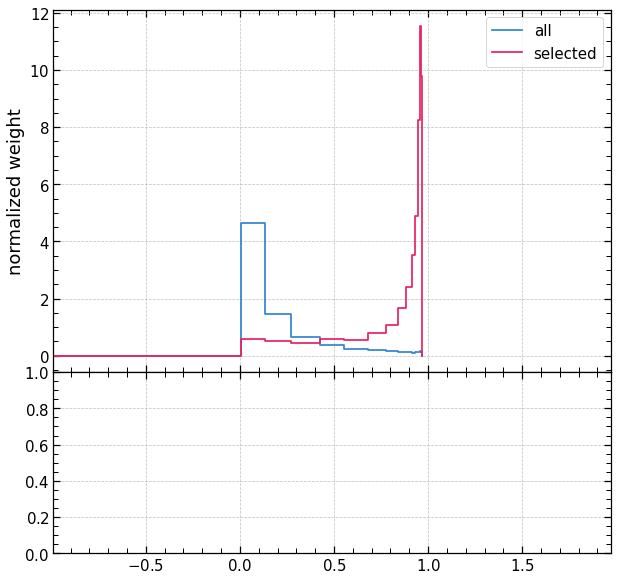


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [14]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)


In [15]:

# nway_res_ero_random = nway.nwaylib.nway_match(
# [ero_random_table, desi_table],
# **nway_args
# )
#cutoffs, _, nway_purity = nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)


In [16]:
os.system('rm DESI*_fit.txt')

0

In [17]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])

In [18]:
nway_res_ero


,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,bias_DESI_nnmag_grz,bias_DESI_nnmag_grzw1,bias_DESI_nnmag_grzw1w2,p_single,match_flag,prob_has_match,prob_this_match,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp,desi_id,ra,dec,rel_dered_mag_g,rel_dered_mag_r,rel_dered_mag_z,rel_dered_mag_w1,rel_dered_mag_w2,rel_dered_mag_w3,rel_dered_mag_w4,rel_dered_g_r,rel_dered_r_z,rel_dered_g_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,prior_type,nnmag_grzw1w2,nnmag_grzw1w2_orig,nnmag_grzw1,nnmag_grzw1_orig,nnmag_grz,nnmag_grz_orig,rel_dered_mag_g_orig,rel_dered_mag_r_orig,rel_dered_mag_z_orig,rel_dered_mag_w1_orig,rel_dered_mag_w2_orig,rel_dered_mag_w3_orig,rel_dered_mag_w4_orig,rel_dered_g_r_orig,rel_dered_r_z_orig,rel_dered_g_z_orig,rel_dered_z_w1_orig,rel_dered_r_w2_orig,rel_dered_w1_w2_orig,rel_dered_z_w3_orig,rel_dered_r_w4_orig,rel_dered_w3_w4_orig
0,0,10477,0.042512,0.042512,2,11.194774,11.194774,9.849608e-01,1.000000,1.000000,70.359310,9.997830e-01,1,0.999783,1.000000e+00,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN,b'9011_609162_1184',159.434616,57.198786,-99.000000,-99.000000,-99.00000,-99.0,-99.0,0.407712,0.382073,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,0.134679,0.273902,0.089736,b'grzw1w2',0.965787,0.965787,-99.000000,0.933825,-99.000000,0.989550,16.058165,16.111576,15.616705,14.459218,14.227020,14.269917,13.372561,-0.053411,0.494871,0.441460,1.157487,1.884556,0.232198,1.346788,2.739015,0.897356
17,0,2289777,9.399113,9.399113,2,-24.167198,-24.167198,2.845910e-34,1.000000,1.000000,1.000000,2.845910e-34,0,0.999783,6.175980e-38,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN,b'9011_609162_1223',159.439360,57.199177,-99.000000,-99.000000,0.65618,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.000000,b'None',-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,NaN,NaN,22.966312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,784835,9.507520,9.507520,2,-24.987633,-24.987633,4.303153e-35,1.000000,1.000000,0.711537,3.061853e-35,0,0.999783,6.644604e-39,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN,b'9011_609162_1210',159.437965,57.200696,-99.000000,-99.000000,-99.00000,-99.0,-99.0,0.503986,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,0.540583,-99.000000,-99.000000,b'grzw1w2',0.350617,0.350617,-99.000000,0.597174,-99.000000,0.436775,23.338484,23.416210,23.045345,21.072514,21.045940,17.639517,NaN,-0.077726,0.370865,0.293139,1.972831,2.370270,0.026574,5.405828,NaN,NaN
12,0,1418906,10.924277,10.924277,2,-36.574707,-36.574707,1.113557e-46,1.000000,1.000000,1.000000,1.113557e-46,0,0.999783,2.416559e-50,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN,b'9011_609162_1191',159.435390,57.201792,0.685364,0.687664,-99.00000,-99.0,-99.0,-99.000000,-99.000000,-0.008048,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.000000,b'None',-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,23.987741,24.068224,NaN,NaN,NaN,NaN,NaN,-0.080483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0,1123492,13.104032,13.104032,2,-57.540070,-57.540070,1.206006e-67,1.000000,1.000000,0.123205,1.485863e-68,0,0.999783,3.224509e-72,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN,b'9011_609162_1232',159.440651,57.200364,-99.000000,-99.000000,-99.00000,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.000000,b'grzw1w2',0.018682,0.018682,-99.000000,0.042445,-99.000000,0.334616,23.716750,22.213188,20.890049,20.275759,20.926012,NaN,NaN,1.503562,1.323139,2.826701,0.614290,1.287176,-0.650253,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

NWAY PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for nway matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct nway assignment
 Completeness = 94% 
 Purity = 94% 
 prob_has_match optimal cutoff =  0.52 
 Fraction of sources with prob_has_match > 0.52 = 81%
+++Statistics+++
667 X-ray sources in validation set with counterparts
--Out of those, 43 sources were assigned hostless (prob_has_match < 0.52) 
624 sources have prob_has_match > 0.52
Out of those 624: 
--585 sources have correct nway counterpart
--39 sources have incorrect nway counterpart


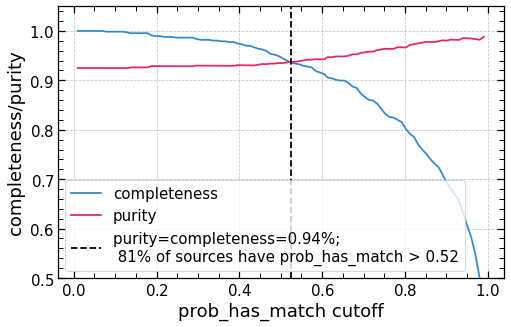

In [19]:
assess_goodnes_nway_cross_match(nway_res_ero);